In [135]:
import numpy as np
import matplotlib.pylab as plt

In [187]:
t = np.linspace(0.1,100,100)
der1 = lambda t: np.cos(t)
actder1 = lambda t: -np.sin(t)
der2 = lambda t: np.exp(t)
secder = lambda t: -np.cos(t)
def forward(f,t,h):
    return (f(t+h)-f(t))/h
def central(f,t,h):
    return (f(t+h/2)-f(t-h/2))/h
def extrapol(f,t,h):
    return (8*(f(t+h/4)-f(t+h/4))-(f(t+h/2)-f(t-h/2)))/3/h
def second(f,t,h):
    return (f(t+h)+f(t-h)-2*f(t))/h**2

def minh(f,df,met,t):
    alpha=0.1
    listah=[np.pi/10]
    for i in range(10000):
        X=met(f,t,listah[-1])
        h=listah[-1]-(alpha/len(t))*np.dot((X-df(t)),X)
        listah.append(h)
    return listah
h=minh(der2,der2,central,t)
e=[]
h

/Users/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


[0.3141592653589793,
 -3.445358394879032e+81,
 -inf,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,

In [136]:
np.finfo(float).eps

2.220446049250313e-16

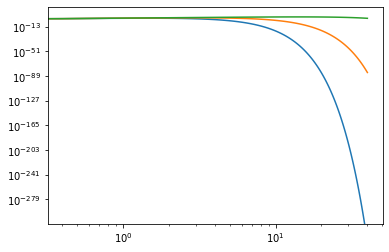

In [208]:
def MB(x,sigma):
    return x**2 * np.exp(-(x**2)/(2*sigma**2))
x=np.linspace(0,40,100)
sigmas = [1,2,10]
for i in sigmas:
    plt.loglog(x,MB(x,i))
plt.savefig('mb.png')

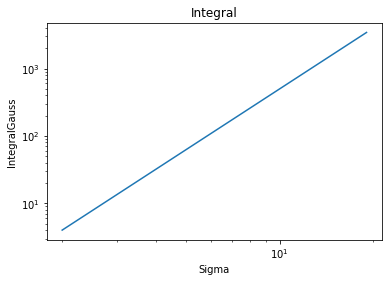

In [202]:
sigma = np.arange(2,20)
def gaussian(df,sigma,N,a=1):
    yi, wi = np.polynomial.legendre.leggauss(N)
    xi = (sigma/2)*((1+yi)/(1-yi))
    dw = ((2*(sigma/2))/(1-yi**2))*wi
    df1 = dw*df(xi,sigma) 
    integ = sum(df1)
    return integ
inte = []

for i in range(len(sigma)):
    inte.append(gaussian(MB,sigma[i],100))
plt.loglog(sigma,inte)
plt.title('Integral')
plt.xlabel('Sigma')
plt.ylabel('IntegralGauss')
plt.savefig('Integral.png')

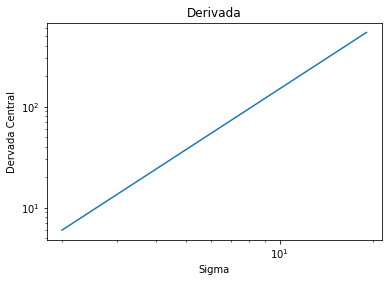

In [209]:
def central(f,t,h):
    return (f(MB,t+h,100)-f(MB,t-h,100))/(2*h)
deri = []
for i in range(len(sigma)):
    deri.append(central(gaussian,sigma[i],0.003))
plt.loglog(sigma,deri)
plt.title('Derivada')
plt.xlabel('Sigma')
plt.ylabel('Dervada Central')
plt.savefig('Deri.png')